# TESTING MODELS for rating their ability to Scale:

In [45]:
import numpy as np 
import os

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [46]:
# Defining Constants 

IMG_WIDTH = 224
IMG_HEIGHT = 224
NUM_CHANNELS = 3   # 3 channels - coloured UI screenshots images 
NUM_CLASSES = 2

---
### Importing trained Model weights and building layers:


In [54]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint

In [80]:
base_model_mobile = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [81]:
x_mobile = base_model_mobile.output
x_mobile = GlobalAveragePooling2D()(x_mobile)

x_mobile = Dense(1024, activation='relu')(x_mobile)

# Add a logistic layer -- we have 1 class
predictions_mobile = Dense(1, activation='sigmoid')(x_mobile)

In [82]:
model_mobile = Model(inputs=base_model_mobile.input, outputs=predictions_mobile)

In [83]:
for layer in base_model_mobile.layers:
    layer.trainable = False

In [84]:
# Compiling models and adding Optimizers
model_mobile.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['Accuracy'])

In [105]:
# Loading trained weights

model_mobile.load_weights("minor_deviation_detection_MOBILE.h5")
# model_mobile.load_weights("minor_deviation_detection_soft_max_MOBILE.h5")

# model_mobile.load_weights("best_weights_MOBILE.h5")

---
# Loading Test UI Samples for Rating:

In [106]:
def load_data(direc):
    imgs = []
    for file in os.listdir(direc):
        path = os.path.join(direc, file)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        imgs.append(img)
    return imgs

In [138]:
fake_samples_path_01 = os.path.join('sample-set', 'approved-ss')

In [139]:
fake_samples_data = load_data(fake_samples_path_01)

In [140]:
def preprocess_data(img_data):
    # normalizing:
    img_data = img_data.astype('float32')
    img_data /= 255.0
    return img_data

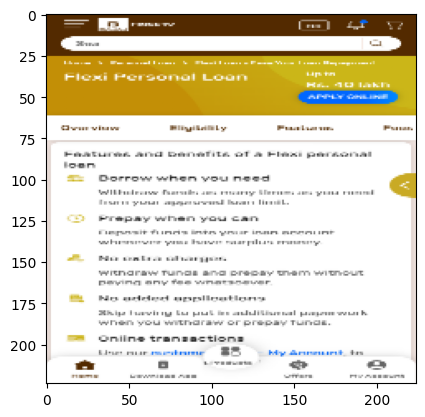

In [141]:
X_test = np.array(fake_samples_data)
X_test = preprocess_data(X_test)
plt.imshow(X_test[1])

In [142]:
X_test.shape

(9, 224, 224, 3)

# PREDICTION:

In [143]:
X_test[0].shape

(224, 224, 3)

In [144]:
def prediction(img):
    img = np.expand_dims(img, axis=0)
    predicted = model_mobile.predict(img)

    print(predicted)
    return predicted

In [145]:
for img in X_test:
    prediction(img)

1/1 [==============================] - 0s 233ms/step
[[0.7595097]]
1/1 [==============================] - 0s 25ms/step
[[0.7546458]]
1/1 [==============================] - 0s 42ms/step
[[0.799052]]
1/1 [==============================] - 0s 44ms/step
[[0.29199484]]
1/1 [==============================] - 0s 31ms/step
[[0.67946017]]
1/1 [==============================] - 0s 30ms/step
[[0.04489955]]
1/1 [==============================] - 0s 38ms/step
[[0.36822417]]
1/1 [==============================] - 0s 32ms/step
[[0.25223628]]
1/1 [==============================] - 0s 31ms/step
[[0.0526208]]


In [104]:
for img in X_test:
    prediction(img)

1/1 [==============================] - 0s 39ms/step
[[0.5467059]]
1/1 [==============================] - 0s 21ms/step
[[0.7777461]]
1/1 [==============================] - 0s 23ms/step
[[0.03273173]]
1/1 [==============================] - 0s 25ms/step
[[0.9901281]]
1/1 [==============================] - 0s 42ms/step
[[0.83506095]]
1/1 [==============================] - 0s 29ms/step
[[0.827019]]
1/1 [==============================] - 0s 38ms/step
[[0.96904147]]
1/1 [==============================] - 0s 27ms/step
[[0.9708971]]
1/1 [==============================] - 0s 21ms/step
[[0.97092146]]


In [120]:
for test in X_test:
    prediction(img)

1/1 [==============================] - 0s 40ms/step
[[0.00035854]]
1/1 [==============================] - 0s 27ms/step
[[0.00035854]]


In [122]:
fake_data_path = os.path.join('dataset', 'other-ss')
original_data_path = os.path.join('dataset', 'approved-ss')

In [123]:
fake_data = load_data(fake_data_path)
original_data = load_data(original_data_path)

In [125]:
fake = np.array(fake_data)
fake = preprocess_data(fake)

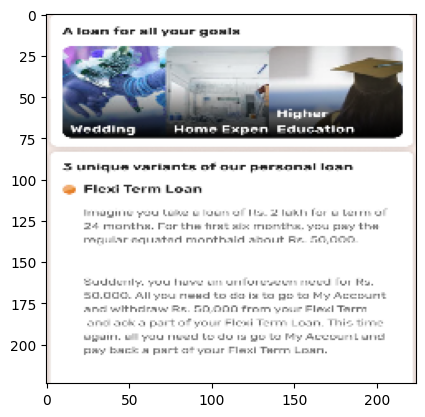

In [126]:
plt.imshow(fake[1])

In [127]:
orig = np.array(original_data)
orig = preprocess_data(orig)

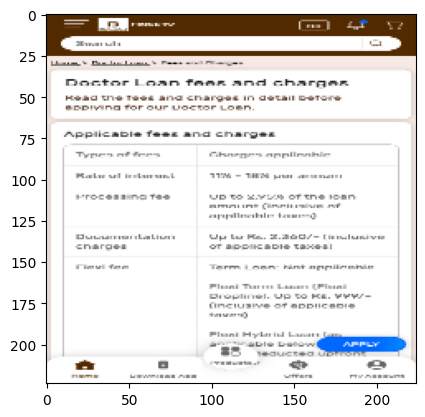

In [130]:
plt.imshow(orig[65])

In [131]:
approved_designs_scores = []
other_designs_scores = []

In [133]:
for img in orig:
    approved_designs_scores.append(prediction(img))

1/1 [==============================] - 1s 565ms/step
[[0.8447582]]
1/1 [==============================] - 0s 44ms/step
[[0.6111093]]
1/1 [==============================] - 0s 30ms/step
[[0.26993465]]
1/1 [==============================] - 0s 34ms/step
[[0.6414711]]
1/1 [==============================] - 0s 38ms/step
[[0.6442379]]
1/1 [==============================] - 0s 32ms/step
[[0.49690846]]
1/1 [==============================] - 0s 31ms/step
[[0.71466386]]
1/1 [==============================] - 0s 31ms/step
[[0.7163834]]
1/1 [==============================] - 0s 30ms/step
[[0.07704568]]
1/1 [==============================] - 0s 26ms/step
[[0.18293394]]
1/1 [==============================] - 0s 32ms/step
[[0.59173673]]
1/1 [==============================] - 0s 31ms/step
[[0.34435168]]
1/1 [==============================] - 0s 30ms/step
[[0.7639092]]
1/1 [==============================] - 0s 39ms/step
[[0.6673331]]
1/1 [==============================] - 0s 20ms/step
[[0.39061183]]
1

In [134]:
for img in fake:
    other_designs_scores.append(prediction(img))

1/1 [==============================] - 0s 28ms/step
[[0.9442455]]
1/1 [==============================] - 0s 22ms/step
[[0.00270557]]
1/1 [==============================] - 0s 21ms/step
[[0.01137119]]
1/1 [==============================] - 0s 24ms/step
[[0.01752585]]
1/1 [==============================] - 0s 23ms/step
[[0.00569598]]
1/1 [==============================] - 0s 25ms/step
[[0.00199432]]
1/1 [==============================] - 0s 18ms/step
[[0.7412493]]
1/1 [==============================] - 0s 27ms/step
[[0.58257955]]
1/1 [==============================] - 0s 20ms/step
[[0.85058373]]
1/1 [==============================] - 0s 19ms/step
[[0.00013535]]
1/1 [==============================] - 0s 18ms/step
[[7.7938785e-06]]
1/1 [==============================] - 0s 22ms/step
[[2.8969976e-05]]
1/1 [==============================] - 0s 21ms/step
[[0.00288038]]
1/1 [==============================] - 0s 21ms/step
[[0.00425838]]
1/1 [==============================] - 0s 20ms/step
[[0.00

In [135]:
approved_designs_scores = np.array(approved_designs_scores)
other_designs_scores = np.array(other_designs_scores)

In [146]:
highest_point = np.max(approved_designs_scores)
highest_point

0.9891306

In [147]:
lowest_point = np.min(other_designs_scores)
lowest_point

2.7067442e-06

In [149]:
1 + 9*(0.0526208 - 2.7067442e-06)/(0.9891306 - 2.7067442e-06)

1.4787680567205794